In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.preprocessing import LabelEncoder
import tkinter as tk
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('eng.csv')

In [3]:
# Separate features and target
X = data.drop(['Gender', 'ID', 'DOB', 'CollegeID', '12graduation' ,'10board', '12board' , 'CollegeState','CollegeCityID', 'CollegeCityTier','GraduationYear','CollegeTier','12percentage', 'Degree', 'English', 'Logical' ,'Domain', 'ComputerProgramming' , 'ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','extraversion','nueroticism','Salary'], axis=1) # Features
y = (data['Gender'] == 'm').astype(int)  # Convert 'Gender' to binary (0 for Male, 1 for Female)

In [4]:
X

,10percentage,Specialization,collegeGPA,Quant,conscientiousness,agreeableness,openess_to_experience
0,87.80,instrumentation and control engineering,73.82,810,-0.1590,0.3789,0.2889
1,57.00,computer science & engineering,65.00,210,1.1336,0.0459,-0.2859
2,77.33,electronics & telecommunications,61.94,505,0.5100,-0.1232,-0.2875
3,84.30,computer science & engineering,80.40,635,-0.4463,0.2124,0.4805
4,82.00,biotechnology,64.30,365,-1.4992,-0.7473,0.1864
...,...,...,...,...,...,...,...
2993,75.00,electronics and communication engineering,70.00,445,-1.1901,0.9688,0.0284
2994,84.00,information technology,75.20,395,-0.1082,0.0328,0.5024
2995,91.40,information technology,73.19,485,-0.8810,0.1888,0.6603
2996,88.64,computer engineering,74.81,505,1.4374,1.2808,0.5419


In [5]:
X.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [6]:
specialization = X.Specialization.value_counts(ascending = False)
specialization

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [7]:
specializationlessthan10 = specialization[specialization<=10]
specializationlessthan10

Specialization
other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & produc

In [8]:
def removespeciallessthan10(value):
    if value in specializationlessthan10:
        return 'other'
    else:
        return value
X.Specialization = X.Specialization.apply(removespeciallessthan10)
X.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'other',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering'],
      dtype=object)

In [9]:
X.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: count, dtype: int64

In [10]:
le = LabelEncoder()
X.Specialization = le.fit_transform(X.Specialization)
X.head()

,10percentage,Specialization,collegeGPA,Quant,conscientiousness,agreeableness,openess_to_experience
0,87.80,14,73.82,810,-0.1590,0.3789,0.2889
1,57.00,4,65.00,210,1.1336,0.0459,-0.2859
2,77.33,7,61.94,505,0.5100,-0.1232,-0.2875
3,84.30,4,80.40,635,-0.4463,0.2124,0.4805
4,82.00,0,64.30,365,-1.4992,-0.7473,0.1864


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

C:\Users\Dell\anaconda3\envs\djangoenv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.1)

Epoch 1/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6148 - loss: 0.6681 - val_accuracy: 0.7250 - val_loss: 0.6175
Epoch 2/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7339 - loss: 0.5826 - val_accuracy: 0.7292 - val_loss: 0.5948
Epoch 3/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7489 - loss: 0.5649 - val_accuracy: 0.7292 - val_loss: 0.5879
Epoch 4/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7811 - loss: 0.5305 - val_accuracy: 0.7292 - val_loss: 0.5852
Epoch 5/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7589 - loss: 0.5497 - val_accuracy: 0.7292 - val_loss: 0.5839
Epoch 6/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.5264 - val_accuracy: 0.7292 - val_loss: 0.5819
Epoch 7/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.5373 - val_accuracy: 0.7292 - val_loss: 0.5807
Epoch 8/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.5657 - val_accuracy: 0.7292 - v

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.5080 - val_accuracy: 0.7292 - val_loss: 0.5733
Epoch 52/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7713 - loss: 0.4946 - val_accuracy: 0.7292 - val_loss: 0.5733
Epoch 53/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7637 - loss: 0.4961 - val_accuracy: 0.7292 - val_loss: 0.5735
Epoch 54/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 0.5087 - val_accuracy: 0.7292 - val_loss: 0.5733
Epoch 55/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7665 - loss: 0.4877 - val_accuracy: 0.7292 - val_loss: 0.5736
Epoch 56/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.5074 - val_accuracy: 0.7292 - val_loss: 0.5740
Epoch 57/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.5052 - val_accuracy: 0.7292 - val_loss: 0.5742
Epoch 58/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.4956 - val_accuracy: 0.7292 - val_lo

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7677 - loss: 0.5060 - val_accuracy: 0.7292 - val_loss: 0.5742
Epoch 102/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7729 - loss: 0.4909 - val_accuracy: 0.7292 - val_loss: 0.5743
Epoch 103/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.4920 - val_accuracy: 0.7292 - val_loss: 0.5739
Epoch 104/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.4962 - val_accuracy: 0.7292 - val_loss: 0.5745
Epoch 105/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.5103 - val_accuracy: 0.7292 - val_loss: 0.5745
Epoch 106/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7663 - loss: 0.5097 - val_accuracy: 0.7292 - val_loss: 0.5746
Epoch 107/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7755 - loss: 0.4878 - val_accuracy: 0.7292 - val_loss: 0.5748
Epoch 108/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.5055 - val_accuracy: 0.7292 -

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.4967 - val_accuracy: 0.7292 - val_loss: 0.5765
Epoch 152/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.4978 - val_accuracy: 0.7292 - val_loss: 0.5765
Epoch 153/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.5219 - val_accuracy: 0.7292 - val_loss: 0.5761
Epoch 154/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.5041 - val_accuracy: 0.7292 - val_loss: 0.5759
Epoch 155/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7736 - loss: 0.4877 - val_accuracy: 0.7292 - val_loss: 0.5760
Epoch 156/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.4777 - val_accuracy: 0.7292 - val_loss: 0.5763
Epoch 157/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.4913 - val_accuracy: 0.7292 - val_loss: 0.5763
Epoch 158/200
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - loss: 0.4927 - val_accuracy: 0.7292 -

In [15]:
# Evaluate the model on test data
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("\nTest Set Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Set Evaluation:
Accuracy: 0.7533
Precision: 0.7529
Recall: 1.0000
F1-score: 0.8590


In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  1 148]
 [  0 451]]


In [17]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [18]:
accuracy_score(y_test, y_hat)

0.7516666666666667

In [19]:
# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

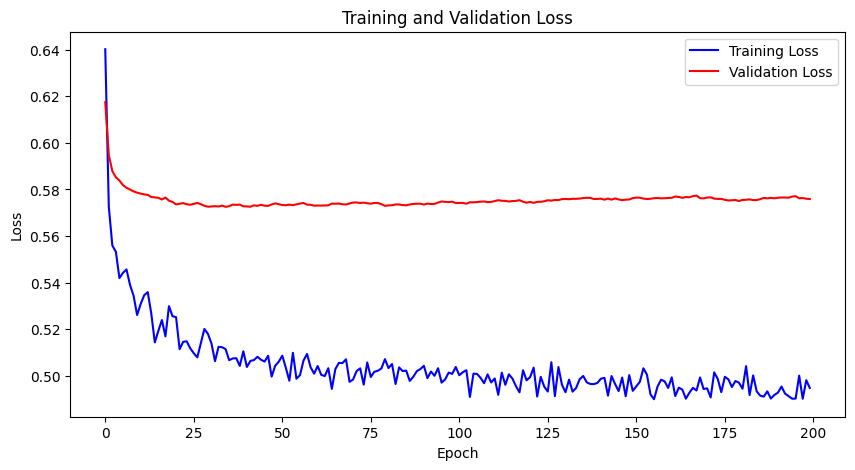

In [20]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

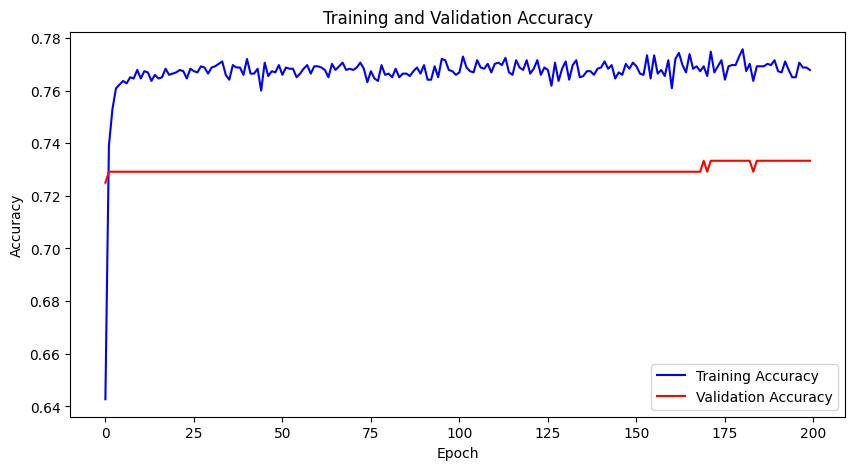

In [21]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Create the Tkinter GUI
root = tk.Tk()
root.title("ANN Gender Predictor")

# Create input fields for the user to enter feature values
input_fields = []
for idx, feature in enumerate(X.columns):
    label = tk.Label(root, text=feature)
    label.grid(row=idx, column=0, padx=10, pady=5, sticky='w')
    entry = tk.Entry(root)
    entry.grid(row=idx, column=1, padx=10, pady=5)
    input_fields.append(entry)

# Define the prediction function
def predict():
    input_values = [float(entry.get()) for entry in input_fields]
    input_array = np.array(input_values).reshape(1, -1)  # Reshape to match ANN input shape
    prediction = model.predict(input_array)
    
    # Determine the predicted class label based on the prediction
    predicted_class = np.round(prediction).flatten()[0]  # Assuming binary classification
    
    # Map the predicted class to 'Female' or 'Male'
    predicted_gender = 'Female' if predicted_class == 0 else 'Male'
    
    # Update the result label with the predicted class
    result_label.config(text=f"Predicted class: {predicted_gender}")

# Create the predict button and result label
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=len(X.columns), column=0, columnspan=2, padx=10, pady=10)

result_label = tk.Label(root, text="")
result_label.grid(row=len(X.columns) + 1, column=0, columnspan=2, padx=10, pady=5)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
